## Data Dictionary

* card: Dummy variable, 1 if application for credit card accepted, 0 if not
* reports: Number of major derogatory reports
* age: Age n years plus twelfths of a year
* income: Yearly income (divided by 10,000)
* share: Ratio of monthly credit card expenditure to yearly income
* expenditure: Average monthly credit card expenditure
* owner: 1 if owns their home, 0 if rent
* selfempl: 1 if self employed, 0 if not.
* dependents: 1 + number of dependents
* months: Months living at current address
* majorcards: Number of major credit cards held
* active: Number of active credit accounts

In [1]:
# Importing necessary libraries

# For data manipulation
import pandas as pd
import numpy as np

# For data visualizations
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# For splitting the data into train/test
from sklearn.model_selection import train_test_split

# For calculating mutual importance score
from sklearn.metrics import mutual_info_score

# For encoding categorical variables for use in a machine learning model
from sklearn.feature_extraction import DictVectorizer

# For building and training a Logistic Regression model
from sklearn.linear_model import LogisticRegression

# For determining model accuracy
from sklearn.metrics import accuracy_score

# For building and training a linear regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# For handling warnings
import warnings
warnings.filterwarnings("ignore")

# For calculating model metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# For performing Kfold cross validation
from sklearn.model_selection import KFold

In [2]:
# Reading in data into dataframe
df = pd.read_csv("AER_credit_card_data.csv")
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [3]:
# Getting info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [4]:
# Storing categorical columns in a list
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
categorical_columns

['card', 'owner', 'selfemp']

In [5]:
# Storing numerical columns in a list
numerical_columns = list(df.dtypes[df.dtypes != "object"].index)
numerical_columns

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [6]:
# Checking for missing values
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [7]:
# Converting card application status into numerical values since output range for a binary classification model is between 0 and 1
# Application accepted is encoded as 1, and application rejected will be encoded as 0
convert = {"yes" : 0, "no" : 1}
df = df.replace({"card": convert})

In [8]:
# Viewing first 20 rows to verify target conversion is successful
df.head(20)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,0,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,0,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,0,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,0,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,0,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,0,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,0,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,0,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,0,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [9]:
# Creating train, val, and test splits of 60%, 20%, and 20% with seed value of 1
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [10]:
# Dropping any added indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# Assigning ground truth for validating model performance on train, validation, and test dataframes for classification model
y_train = df_train["card"]
y_val = df_val["card"]
y_test = df_test["card"]

# Deleting target from training, validation, and testing data
df_train.drop(["card"], axis = 1, inplace = True)
df_val.drop(["card"], axis = 1, inplace = True)
df_test.drop(["card"], axis = 1, inplace = True)

### Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the card variable.
Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* reports
* dependents
* active
* share

In [12]:
# Loop to go through each numerical column to calculate AUC score with any score less than 0.5 being converted to positive
for c in numerical_columns:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


### Question 1 Answer: Of the four options, share has the highest AUC.

### Training the model
From now on, use these columns only:

* ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

* LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [13]:
# Specifying columns for One-Hot Encoding
cols = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [14]:
# Specifying a new training dictionary without card
train_dict = df_train[cols].to_dict(orient = "records")

In [15]:
# Using DictVectorizer instead of having to use LabelEncoder and OneHotEncoder separately
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [16]:
# Defining a Logistic Regression Model
model = LogisticRegression(solver = "liblinear", C = 1.0, max_iter = 1000)

# Fitting the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

### Question 2: What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.615
* 0.515
* 0.715
* 0.995

In [17]:
# Encoding columns for the validation data set
val_dicts = df_val[cols].to_dict(orient = "records")
X_val = dv.transform(val_dicts)

# Generating predictions on the validation dataset
y_pred = model.predict_proba(X_val)[:, 1]

In [18]:
# Getting AUC score for model on validation data and predictions on validation data inputs (X_val)
round(roc_auc_score(y_val, y_pred), 3)

0.995

### Question 2 Answer: AUC of the model on the validation dataset is 0.995.

### Question 3: 

Now let's compute precision and recall for our model.

* Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.1
* 0.3
* 0.6
* 0.8

In [19]:
# Defining confusion matrix dataframe for creating a confusion matrix
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [20]:
# Creating a new dataframe to store confusion matrix results
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [21]:
# Displaying all rows and columns for df_scores for every 10 records
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,53,211,0,0
10,0.1,53,7,0,204
20,0.2,52,7,1,204
30,0.3,52,7,1,204
40,0.4,52,7,1,204
50,0.5,52,7,1,204
60,0.6,52,6,1,205
70,0.7,48,6,5,205
80,0.8,48,4,5,207
90,0.9,36,1,17,210


In [22]:
# Calculating precision and recall values and creating associated columns to store values in df_scores
df_scores["precision"] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores["recall"] = df_scores.tp / (df_scores.tp + df_scores.fn)

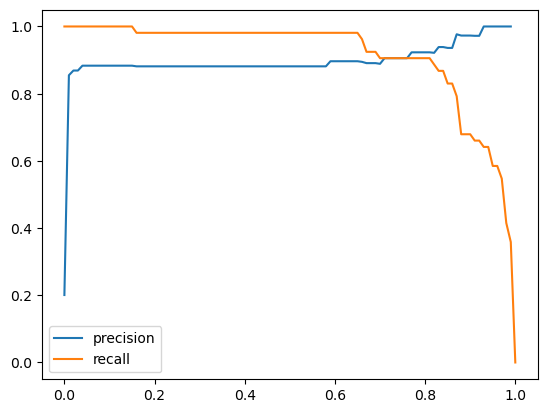

In [23]:
# Plotting Precision and Recall as well as an intersection line
plt.plot(df_scores.threshold, df_scores.precision, label = "precision")
plt.plot(df_scores.threshold, df_scores.recall, label = "recall")

plt.legend()
plt.show()

### Question 3 Answer: 0.8 is the threshold precision and recall curves intersect.

### Question 4: Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing : F1 = 2 * ((Precision * Recall) / (Precision + Recall))

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

* 0.1
* 0.4
* 0.6
* 0.7

In [24]:
# Calculating F1 sccores (and creating a new dataframe column) using previously calculated precision and recall values, which already where calculated on increments of 0.01
df_scores['f1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)

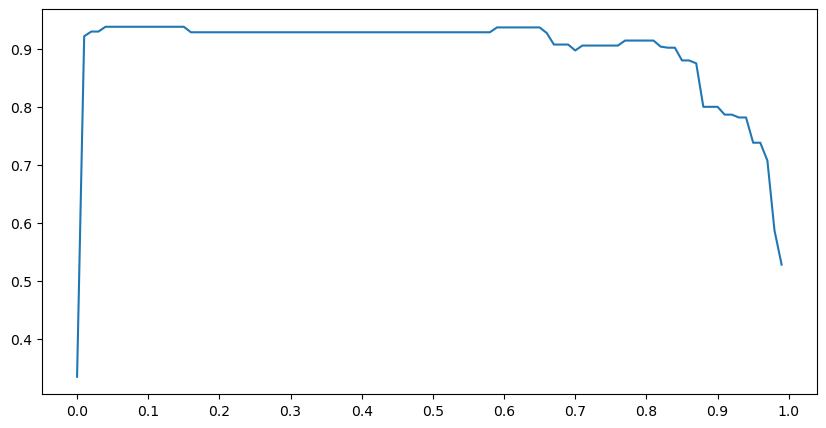

In [25]:
# Plotting to determine where the F1 Score is at its maximum value
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

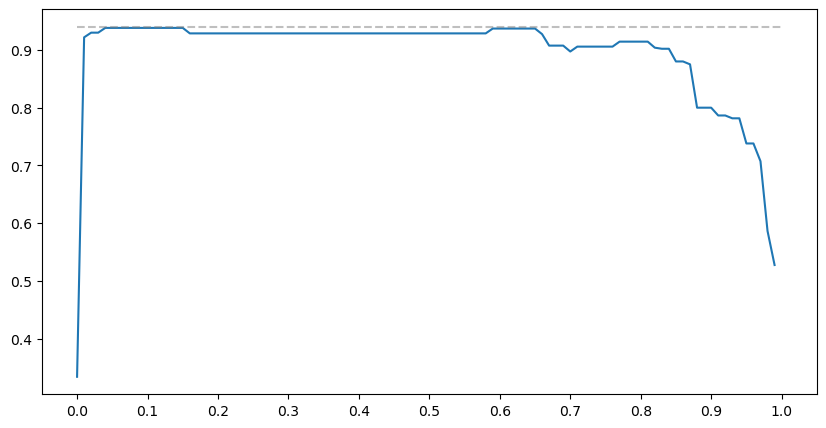

In [26]:
# Plotting a horizontal line at 0.94 to see if it is the highest F1 Score
# Plotting to determine where the F1 Score is at its maximum value
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.hlines(0.94, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

### Question 4 Answer: 0.1 is the maximal F1 Score.

### Question 5: 

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

* 0.003
* 0.014
* 0.09
* 0.24

In [27]:
# Building and training a model on training inputs
def train(df_train, y_train, C = 1.0):
    dicts = df_train[cols].to_dict(orient = "records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver = "liblinear", C = C, max_iter = 1000)
    model.fit(X_train, y_train)

    return dv, model

# Generating model predictions 
def predict(df, dv, model):
    dicts = df[cols].to_dict(orient = "records")

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [28]:
# For performing kfold cross validation using five folds
scores = []

kfold = KFold(n_splits = 5, shuffle = True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C = 1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


### Question 5 Answer: The standard deviation across the different AUC scores is 0.003.

### Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

* 0.01
* 0.1
* 1
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [29]:
# For performing kfold cross validation using five folds
scores = []

kfold = KFold(n_splits = 5, shuffle = True, random_state=1)

for c in [0.01, 0.1, 1, 10]:
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.card.values
        y_val = df_val.card.values
        
        dv, model = train(df_train, y_train, C = c)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print("For c=%.2f: %.3f +- %.3f" % (c, np.mean(scores), np.std(scores)))

For c=0.01: 0.992 +- 0.006
For c=0.10: 0.993 +- 0.005
For c=1.00: 0.994 +- 0.005
For c=10.00: 0.995 +- 0.004


### Question 6 Answer: C = 10 leads to the best mean score.